# Visualizando dados do SUS

### Para esse começo do bootcamp, vamos analisar os dados da saúde disponíveis em:
http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sih/cnv/qiuf.def

Em que aplicamos: linha=Unidade da federação, Coluna= Ano/mês processamento, Conteúdo= Valor total, Períodos: Todos disponíveis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dados = pd.read_csv("A144149189_28_143_208.csv",
                    encoding="ISO-8859-1",
                    skiprows=3, sep=";", skipfooter=12, engine="python",
                    thousands=".", decimal=",")
'''
Aqui pulam-se as três primeiras/12 últimas linhas do dataset pois não continham informação para nós,
também precisou-se corrigir a formatação numérica: thousand e decimal pois os dados estão no formato brasileiro e o python por
padrão lê no formato norte-americano, nesse caso as colunas numéricas seriam entendidas como texto
'''

dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,9.964113e+08
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,4.500485e+08
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,1.917248e+09
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3015488.30,2826486.18,2928043.91,3090313.73,3621031.05,3454460.94,3266928.47,3519773.73,3985530.08,3.288770e+08
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,40804126.43,44385715.88,36820249.47,36965931.34,39004315.80,38015145.79,38354682.46,37688314.23,33276392.89,4.705309e+09


In [3]:
dados.info(verbose=True , null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 161 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unidade da Federação  27 non-null     object 
 1   2008/Jan              27 non-null     float64
 2   2008/Fev              27 non-null     float64
 3   2008/Mar              27 non-null     float64
 4   2008/Abr              27 non-null     float64
 5   2008/Mai              27 non-null     float64
 6   2008/Jun              27 non-null     float64
 7   2008/Jul              27 non-null     float64
 8   2008/Ago              27 non-null     float64
 9   2008/Set              27 non-null     float64
 10  2008/Out              27 non-null     float64
 11  2008/Nov              27 non-null     float64
 12  2008/Dez              27 non-null     float64
 13  2009/Jan              27 non-null     float64
 14  2009/Fev              27 non-null     float64
 15  2009/Mar              27

Podemos reparar que há duas colunas em que não temos float64 e sim object: a primeira, como era de se esperar, porém a coluna '2009/Set' também foi entendida como object e não float64. Vamos olhá-la:

In [4]:
dados[['2009/Set', '2009/Out']]

,2009/Set,2009/Out
0,3605007.43,3.907033e+06
1,-,2.826477e+06
2,9730634.16,9.179253e+06
3,1701611.25,1.164711e+06
4,27967969.22,2.843063e+07
5,2034329.78,1.839723e+06
6,6542918.14,6.420059e+06
7,19722895.51,1.927785e+07
8,12247027.29,1.174495e+07
9,34471579.06,3.405813e+07


In [5]:
dados.mean()

2008/Jan    1.512685e+07
2008/Fev    2.271016e+07
2008/Mar    2.459419e+07
2008/Abr    2.543196e+07
2008/Mai    2.651125e+07
                ...     
2020/Dez    5.337776e+07
2021/Jan    5.607375e+07
2021/Fev    5.557823e+07
2021/Mar    6.250230e+07
Total       6.388213e+09
Length: 159, dtype: float64

Podemos reparar que há uma linha a menos: aqui ele nos motra que calculou a média para 159 linhas, falta uma! Essa é a linha de Set/2009 que, como vimos acima, possui um '-' na linha 1. Se rodarmos 'dados['2009/Set'].median()' vamos ver o erro de não conseguir converter '-' para float. Precisamos nos livrar dessa linha inteira ou então preenchê-la com algum valor. Escolhas naturais podem ser colocar um 0 ou a média de valores gasto por aquele estado no ano todo ou alguma outra escolha razoável.

In [6]:
'''
vamos calcular a média gasta pelos estados no mês anterior e seguinte a setembro de 2009 e deppis selecionamos o valor obtido
na linha 1, correspondente ao estado do Acre, e aonde se localiza a nossa linha problemática
'''

(dados['2009/Ago'] + dados['2009/Out'])/2

0     3.720329e+06
1     2.567028e+06
2     9.378789e+06
3     1.506855e+06
4     2.800958e+07
5     1.793131e+06
6     6.455289e+06
7     1.930540e+07
8     1.195693e+07
9     3.437048e+07
10    1.318502e+07
11    1.567102e+07
12    3.819495e+07
13    1.130101e+07
14    5.812097e+06
15    5.194772e+07
16    9.901825e+07
17    1.563115e+07
18    5.413323e+07
19    2.272623e+08
20    6.732549e+07
21    3.652084e+07
22    6.611994e+07
23    1.143250e+07
24    1.197694e+07
25    2.455966e+07
26    1.493252e+07
dtype: float64

In [7]:
dados = dados.replace('-', 2.567028e+06 ,regex=True) #Vamos trocar o - na linha 1 pelo valor numérico da média para aquela linha

In [8]:
dados['2009/Set']

0       3605007.43
1      2.56703e+06
2       9730634.16
3       1701611.25
4      27967969.22
5       2034329.78
6       6542918.14
7      19722895.51
8      12247027.29
9      34471579.06
10     13213817.60
11     16117680.24
12     37971068.17
13     11170853.09
14      6341601.06
15     53839068.59
16     96911075.38
17     15382323.46
18     52027721.77
19    220292973.66
20     65843824.73
21     37380382.93
22     66425009.36
23     11997775.92
24     10810420.65
25     25227845.74
26     14487053.32
Name: 2009/Set, dtype: object

In [9]:
dados['2009/Set'] = pd.to_numeric(dados['2009/Set']) #Agora convertemos a coluna 2009/Set para números

In [10]:
dados['2009/Set']

0     3.605007e+06
1     2.567028e+06
2     9.730634e+06
3     1.701611e+06
4     2.796797e+07
5     2.034330e+06
6     6.542918e+06
7     1.972290e+07
8     1.224703e+07
9     3.447158e+07
10    1.321382e+07
11    1.611768e+07
12    3.797107e+07
13    1.117085e+07
14    6.341601e+06
15    5.383907e+07
16    9.691108e+07
17    1.538232e+07
18    5.202772e+07
19    2.202930e+08
20    6.584382e+07
21    3.738038e+07
22    6.642501e+07
23    1.199778e+07
24    1.081042e+07
25    2.522785e+07
26    1.448705e+07
Name: 2009/Set, dtype: float64

Como podemos ver, agora mudamos de 'object' para float64

Text(0.5, 1.0, 'Valor total gasto (R$) utilizado pelo SUS por unidade da Federação')

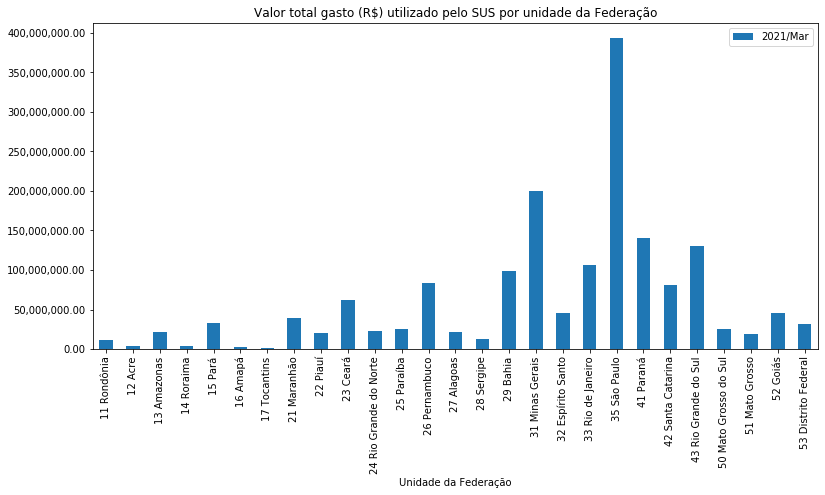

In [25]:
import matplotlib.ticker as ticker

ax = dados.plot(x='Unidade da Federação' , y='2021/Mar' , kind='bar', figsize=(13,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Valor total gasto (R$) utilizado pelo SUS por unidade da Federação')

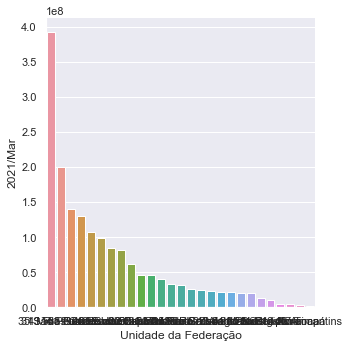

In [32]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

plot_order = dados.groupby('Unidade da Federação')['2021/Mar'].sum().sort_values(ascending=False).index.values
sns.catplot(data=dados, x='Unidade da Federação',  y='2021/Mar',kind='bar',ci=None, legend_out=False, order=plot_order)